# Import Libraries and load dataset

In [49]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
# calculate accuracy measures and confusion matrix
from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

# Read the file

In [50]:
bank_df = pd.read_csv('bank-full.csv')

# Ge the first 10 rows

In [51]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [52]:
bank_df.shape

(45211, 17)

# Get nulls


In [53]:
bank_df.isnull().values.any().sum()

0

In [54]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [55]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [56]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
bank_df.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

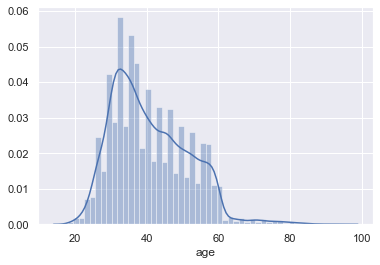

In [58]:
sns.distplot(bank_df['age']);

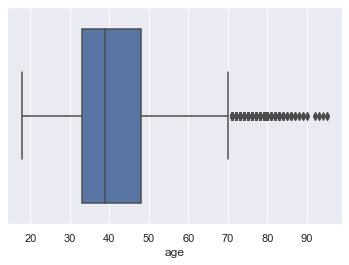

In [59]:
sns.boxplot(bank_df['age']);

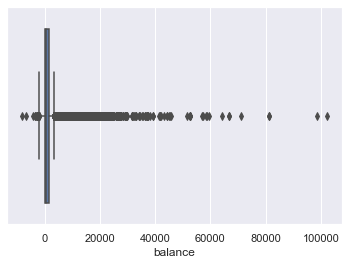

In [60]:
sns.boxplot(bank_df['balance']);

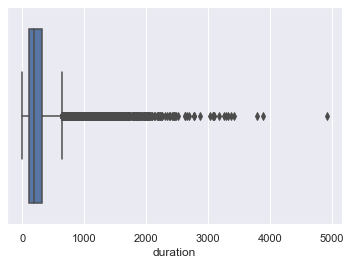

In [61]:
sns.boxplot(bank_df['duration']);

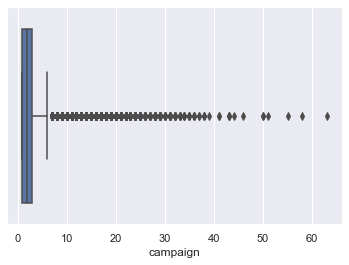

In [62]:
sns.boxplot(bank_df['campaign']);

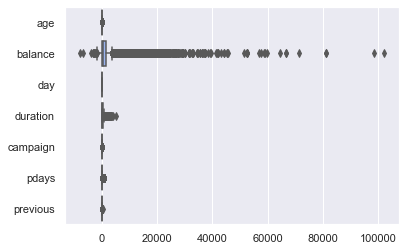

In [63]:
sns.boxplot(data=bank_df,palette='coolwarm',orient='h')


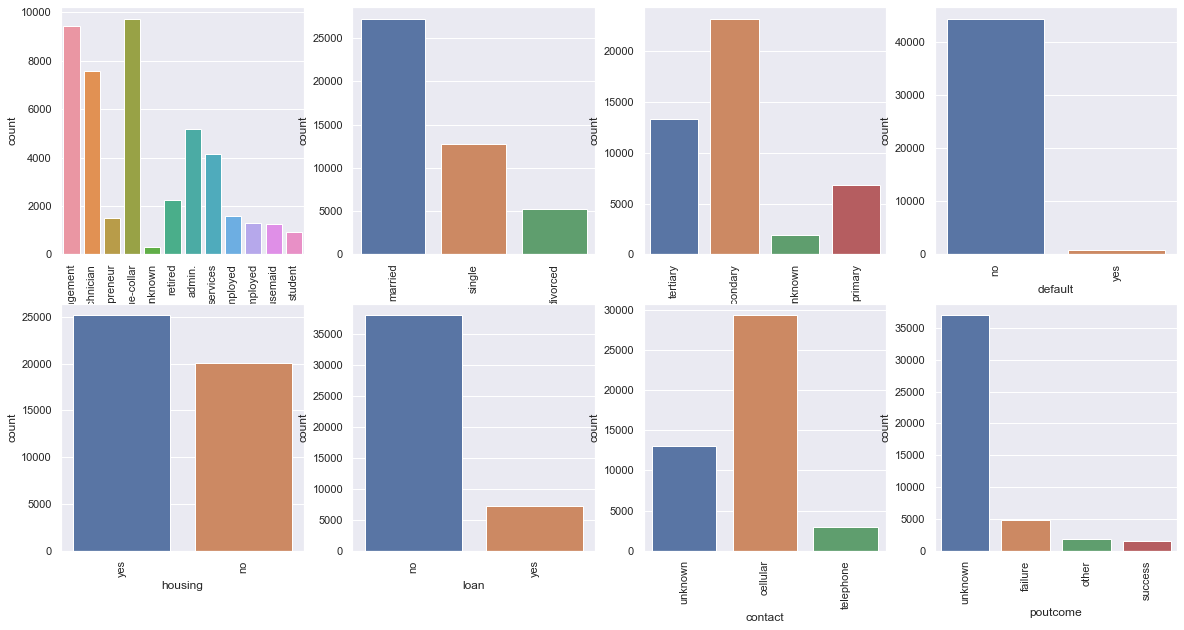

In [64]:
#sns.countplot(bank_df['job']);
categorical = [
  'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome'
]
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(bank_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Targetted more  Married with no default, no loan, with housing  with secondary edication
## Age Analysis
### Age ranging from 18 to 95 years, mean of 40 years, median of 39, Outliers above 80
## Balance Analysis
### Balance ranging from -8k to102K, mean of 1362, median of 442, several outliers
## Day Analysis- Skipping Day as it does not makes sense
## Duration Analysis- How long conversation took place
### ranging from 0.00 to 4918 sec, with a mean of 2.76 sec and Median of 180 sec, skipping outliers
## Campaign Analysis( # of contacts)
### Range from 1 to 63,  mean of 2.76, median of 2.0, several outliers

In [65]:

#sns.scatterplot(bank_df['marital'], bank_df['Target']);
#sns.catplot(x='job', y='Target', data=bank_df, jitter='0.25')
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [66]:
for col in ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month','poutcome', 'Target']:
    bank_df[col] = bank_df[col].astype('category')

In [67]:
#bank_df.dtypes
bank_df['Target'] = (bank_df['Target']=='yes').astype(int)

In [68]:
# Convert the target variable
bank_df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target          int64
dtype: object

In [69]:
## Remove day and month

bank_df.drop(['month','day'],axis=1) 

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,0


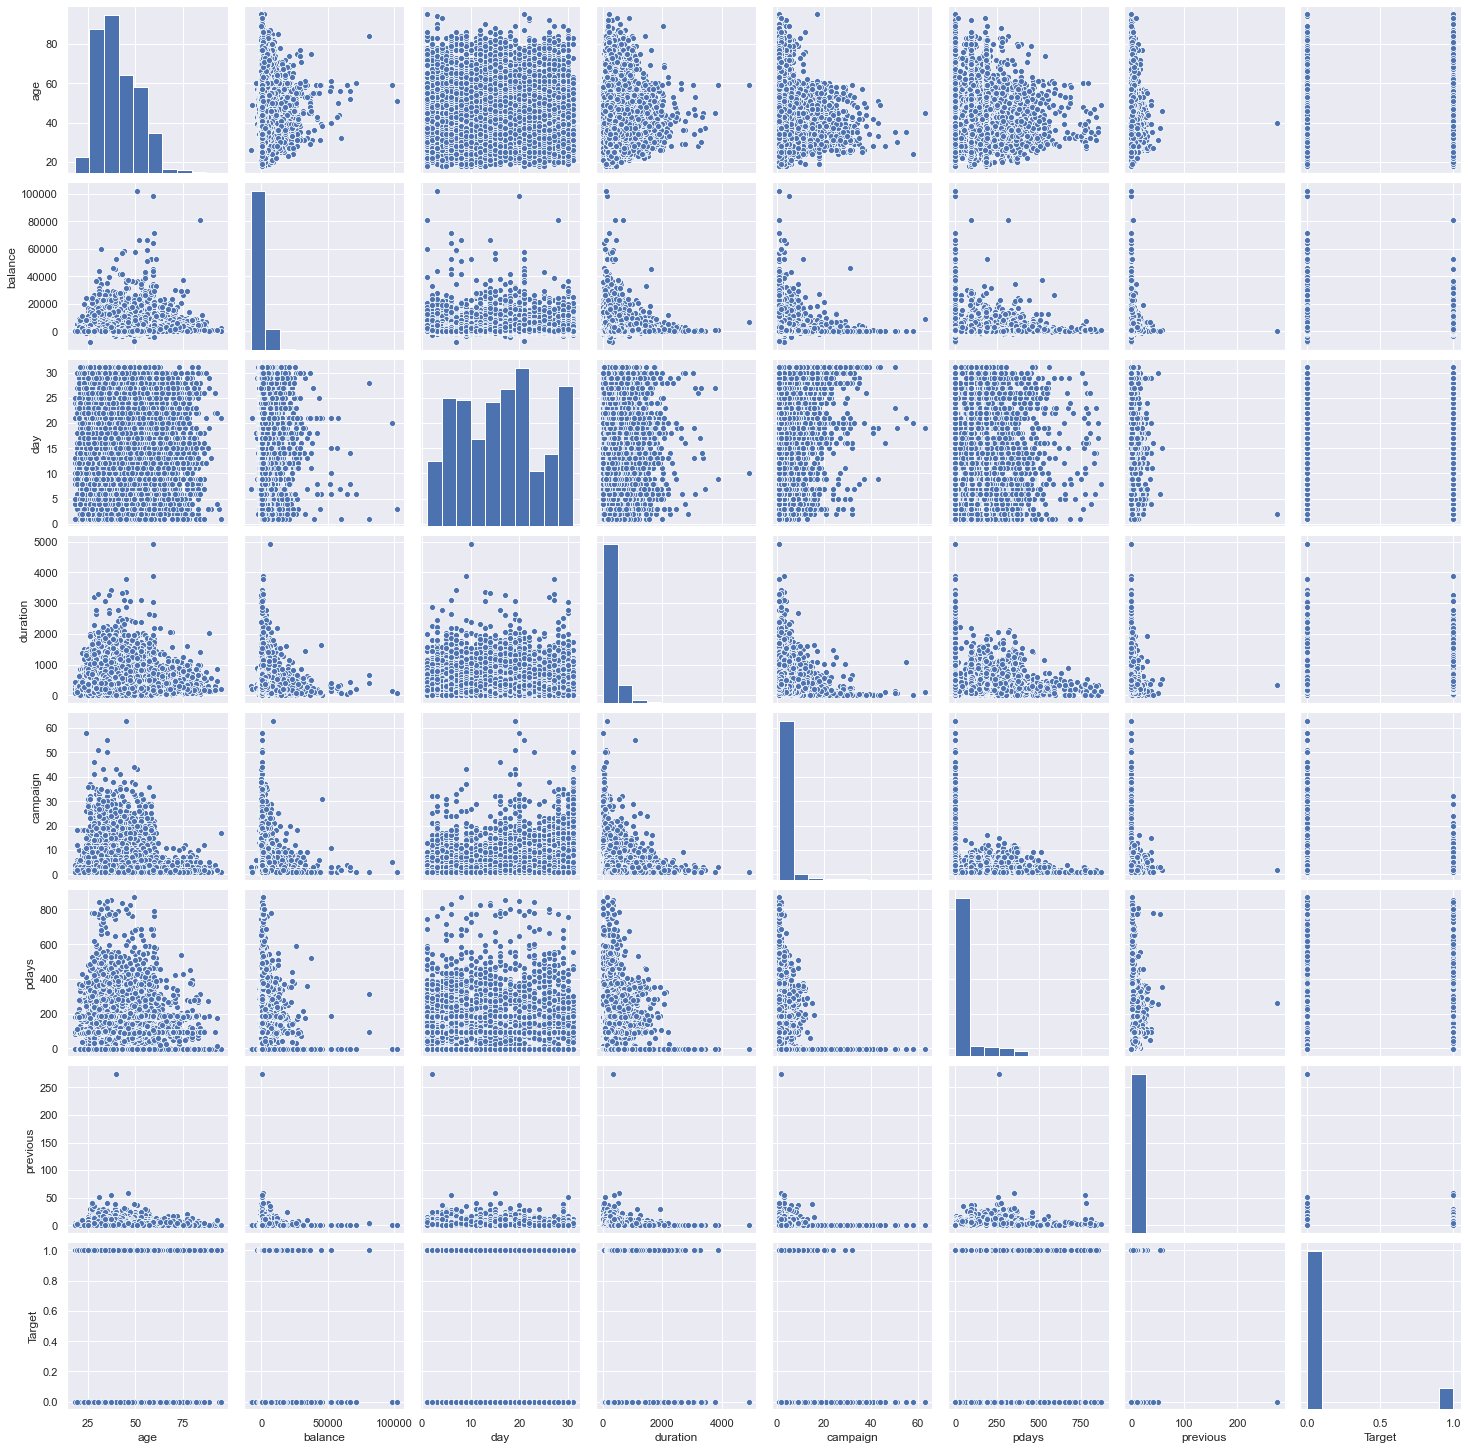

In [70]:
sns.pairplot(bank_df, palette="husl")

In [71]:

## Define X and Y variables 
X = bank_df.drop(['month','day'],axis=1) 

Y = bank_df[['Target']]

In [72]:
X = pd.get_dummies(X)
X

,age,balance,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45207,71,1729,456,2,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
45209,57,668,508,4,-1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


# Logistic Regression


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
from sklearn import metrics

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_predict = logreg.predict(X_test)

In [75]:
## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9800297026574399

Testing accuracy 0.9809790622235329

Confusion Matrix


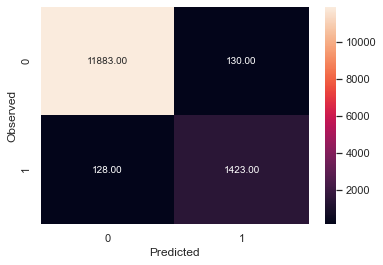

None

Recall: 0.9174725983236621

Precision: 0.9162910495814552

F1 Score: 0.916881443298969

Roc Auc Score: 0.9533254942005392


In [76]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

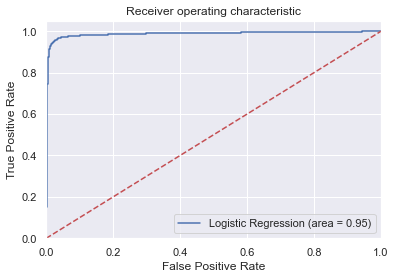

In [77]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Now check Decision Tree

In [78]:
X

,age,balance,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45207,71,1729,456,2,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
45209,57,668,508,4,-1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [79]:
# splitting data into training and test set for independent attributes
n=X['Target'].count()
train_set = X.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = X.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("class") into separate vectors for training set and test set
train_labels = train_set.pop("Target")
test_labels = test_set.pop("Target")
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)

0.7399542873995428

In [81]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))#Print the feature importance of the decision model

                          Imp
age                  0.118594
balance              0.151699
duration             0.491323
campaign             0.047964
pdays                0.009118
previous             0.005852
job_admin.           0.009839
job_blue-collar      0.008946
job_entrepreneur     0.002491
job_housemaid        0.002808
job_management       0.008848
job_retired          0.002647
job_self-employed    0.003911
job_services         0.006658
job_student          0.004153
job_technician       0.014178
job_unemployed       0.003000
job_unknown          0.001271
marital_divorced     0.007431
marital_married      0.007802
marital_single       0.006103
education_primary    0.004722
education_secondary  0.006563
education_tertiary   0.010221
education_unknown    0.003664
default_no           0.000880
default_yes          0.000356
housing_no           0.011110
housing_yes          0.004702
loan_no              0.007062
loan_yes             0.004667
contact_cellular     0.004705
contact_te

# Ada Boost

In [82]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.7665708176657082

In [83]:
print (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = train_set.columns))#Print the feature importance of the decision model

                      Imp
age                  0.10
balance              0.05
duration             0.55
campaign             0.05
pdays                0.00
previous             0.00
job_admin.           0.00
job_blue-collar      0.00
job_entrepreneur     0.00
job_housemaid        0.00
job_management       0.00
job_retired          0.00
job_self-employed    0.00
job_services         0.00
job_student          0.00
job_technician       0.00
job_unemployed       0.00
job_unknown          0.00
marital_divorced     0.00
marital_married      0.05
marital_single       0.00
education_primary    0.00
education_secondary  0.00
education_tertiary   0.05
education_unknown    0.00
default_no           0.00
default_yes          0.00
housing_no           0.00
housing_yes          0.00
loan_no              0.00
loan_yes             0.05
contact_cellular     0.00
contact_telephone    0.05
contact_unknown      0.05
poutcome_failure     0.00
poutcome_other       0.00
poutcome_success     0.00
poutcome_unk

# Bagging Classifier Algorithm

In [45]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(train_set, train_labels)

In [46]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.750571407505714